# Descriptive analysis of the last RUN file

In [1]:
# Needed modules
import pandas as pd
import numpy as np

## Import Data

In [2]:
# Importing the csv data file
data_df = pd.read_csv("../Data/To_analyze/RUNS/run_20.csv", sep=",", header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,LinJ.01,NaN,666,NaN,NaN,NaN,NaN,NaN,NaN,24093,24758,NaN,NaN,plus,GGGGGAGGCGGGGGAGGCGGGGGGCACGCACCTCCATGCGTGGCAT...
1,NaN,LinJ.01,NaN,618,NaN,NaN,NaN,NaN,NaN,NaN,35316,35933,NaN,NaN,plus,GAGGTGGAGGCCGCTCTGCCCCCCCCGCCGCCGAGTGCTGCAGGCA...
2,NaN,LinJ.01,NaN,884,NaN,NaN,NaN,NaN,NaN,NaN,39698,40581,NaN,NaN,plus,CTCACCCTCATCCCACCCCTCCTCGTCCATCGACGGGAGTGGGCGG...
3,NaN,LinJ.01,NaN,645,NaN,NaN,NaN,NaN,NaN,NaN,54885,55529,NaN,NaN,plus,TGTTTGGTCTTCCGCGTGTCCGTTTTCGCTGCCGCACACTGCGAGG...
4,NaN,LinJ.01,NaN,444,NaN,NaN,NaN,NaN,NaN,NaN,75923,76366,NaN,NaN,plus,ACCTCAGCGTGGCATCCCAGGGTCCAGCGCCCCCCCTCCACCCCCG...


In [3]:
data_df = data_df[[1, 3, 10, 11, 14, 15]]  # Substracting the columns that are needed
data_df.columns = range(data_df.columns.size)  # Resetting column index
data_df.head()

,0,1,2,3,4,5
0,LinJ.01,666,24093,24758,plus,GGGGGAGGCGGGGGAGGCGGGGGGCACGCACCTCCATGCGTGGCAT...
1,LinJ.01,618,35316,35933,plus,GAGGTGGAGGCCGCTCTGCCCCCCCCGCCGCCGAGTGCTGCAGGCA...
2,LinJ.01,884,39698,40581,plus,CTCACCCTCATCCCACCCCTCCTCGTCCATCGACGGGAGTGGGCGG...
3,LinJ.01,645,54885,55529,plus,TGTTTGGTCTTCCGCGTGTCCGTTTTCGCTGCCGCACACTGCGAGG...
4,LinJ.01,444,75923,76366,plus,ACCTCAGCGTGGCATCCCAGGGTCCAGCGCCCCCCCTCCACCCCCG...


In [26]:
# Saving subsett for chromosome 1
# data_df[data_df[0] == "LinJ.01"].to_csv("../Manual_Analysis/RUN20_LinJ.01.csv", sep=",", header=None, index=None)

In [4]:
data_df.shape  # Checking the shape of the data

(5747, 6)

In [5]:
data_df.info()  # Checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5747 non-null   object
 1   1       5747 non-null   int64 
 2   2       5747 non-null   int64 
 3   3       5747 non-null   int64 
 4   4       5747 non-null   object
 5   5       5747 non-null   object
dtypes: int64(3), object(3)
memory usage: 269.5+ KB


## Descriptive analysis for all the file

In [6]:
# Counting all the elements for each chromosome
num_per_chromosome = data_df.groupby([0]).size()
num_per_chromosome.head()

0
LinJ.01    33
LinJ.02    56
LinJ.03    15
LinJ.04    37
LinJ.05    34
dtype: int64

In [7]:
# Now let's differentiate the data for each chromosome and strand
num_per_chromosome_strand = data_df.groupby([0, 4]).size()
num_per_chromosome_strand.head()

0        4    
LinJ.01  minus    12
         plus     21
LinJ.02  minus    31
         plus     25
LinJ.03  minus     8
dtype: int64

In [8]:
# Let's change it to a Data Frame with correct columns
num_per_chromosome_strand = num_per_chromosome_strand.unstack(level=-1)
num_per_chromosome_strand.head()

4,minus,plus
0,,
LinJ.01,12,21
LinJ.02,31,25
LinJ.03,8,7
LinJ.04,20,17
LinJ.05,19,15


In [9]:
# Let's see the descriptive statistics:
data_df[1].describe()

count    5747.000000
mean      457.387333
std       275.512044
min       100.000000
25%       221.000000
50%       416.000000
75%       596.000000
max      2318.000000
Name: 1, dtype: float64

## Descriptive Analysis for each cromosome

In [10]:
# First let's group the data by chromosome. This way we create
data_per_chromosome = data_df.groupby([0])
print(f"The type of data is {type(data_per_chromosome)} and the shape is {data_per_chromosome.size().shape}")

The type of data is <class 'pandas.core.groupby.generic.DataFrameGroupBy'> and the shape is (36,)


In [11]:
# Summary statistics for each chromosome
plot_data = []

for group_name, group_data in data_per_chromosome:
    print("="*50)
    print(f"Chromosome {group_name[0]} has {group_data.shape[0]} elements")
    print(group_data[1].describe())

Chromosome LinJ.01 has 33 elements
count      33.00000
mean      446.69697
std       268.47154
min       133.00000
25%       210.00000
50%       371.00000
75%       629.00000
max      1000.00000
Name: 1, dtype: float64
Chromosome LinJ.02 has 56 elements
count      56.000000
mean      464.767857
std       282.753410
min       122.000000
25%       207.000000
50%       387.500000
75%       707.250000
max      1104.000000
Name: 1, dtype: float64
Chromosome LinJ.03 has 15 elements
count     15.000000
mean     282.733333
std       90.609418
min      162.000000
25%      203.500000
50%      283.000000
75%      349.500000
max      466.000000
Name: 1, dtype: float64
Chromosome LinJ.04 has 37 elements
count      37.000000
mean      461.918919
std       371.009088
min       100.000000
25%       288.000000
50%       383.000000
75%       452.000000
max      1836.000000
Name: 1, dtype: float64
Chromosome LinJ.05 has 34 elements
count      34.000000
mean      488.382353
std       224.457057
min       

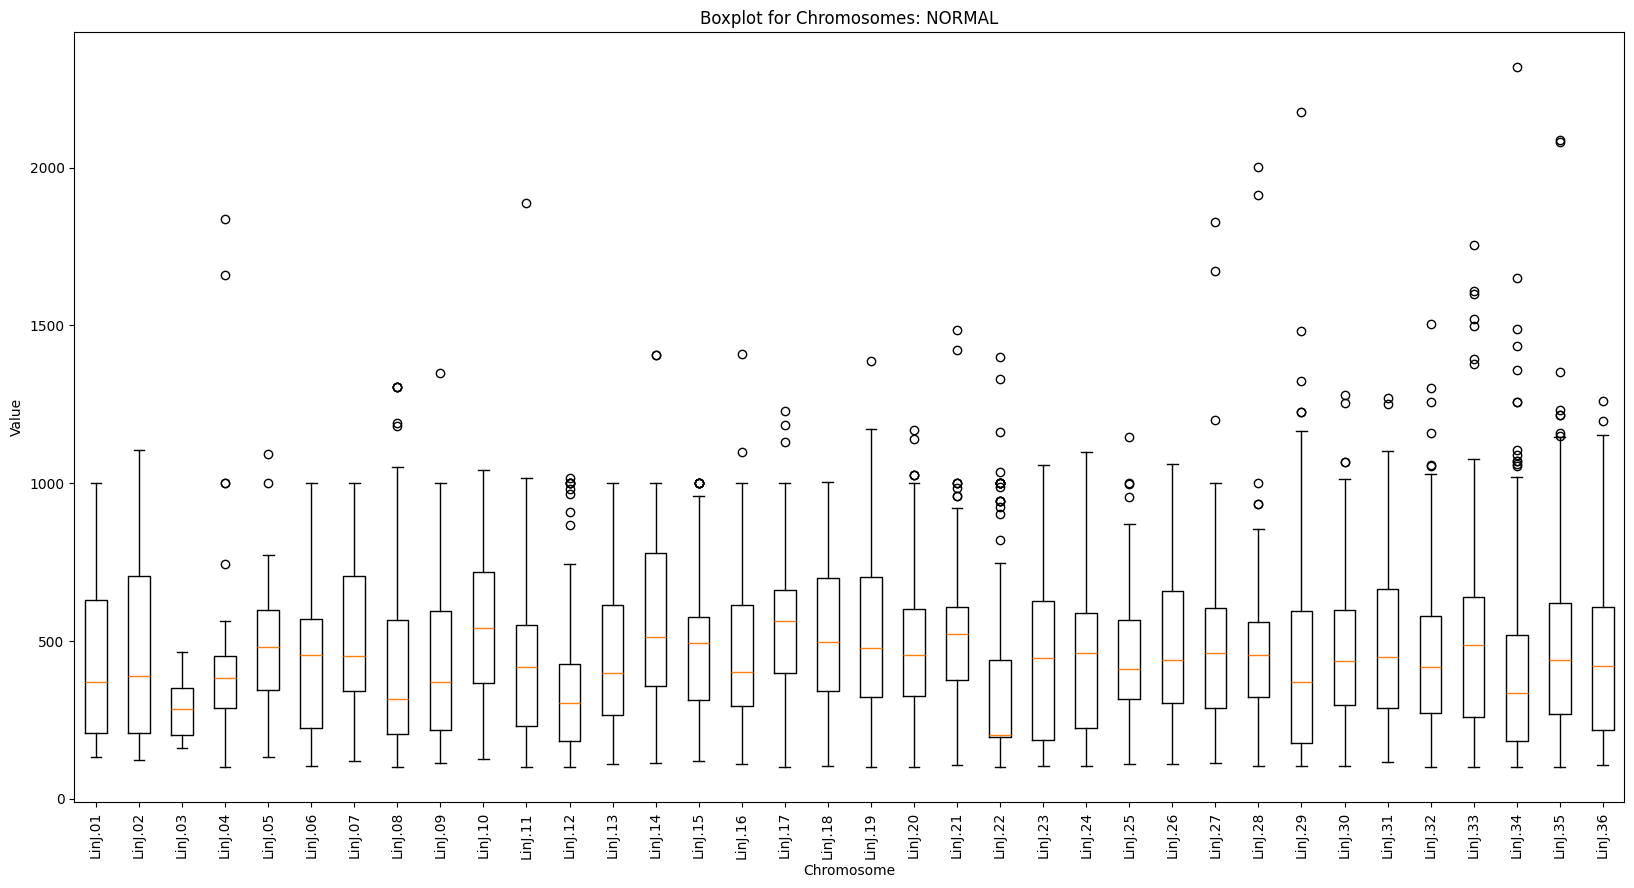

In [12]:
# Boxplot for the data

import matplotlib.pyplot as plt
import seaborn as sns
box_plot_data = [group_data[1] for group_name, group_data in data_per_chromosome]

plt.figure(figsize=(20, 10))
plt.boxplot(box_plot_data, labels=[group_name[0] for group_name, _ in data_per_chromosome])
plt.title("Boxplot for Chromosomes: NORMAL")
plt.xlabel("Chromosome")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.savefig("./images/01.boxplot_NORMAL.png")
plt.show()

### Removing > 1000nt

In [13]:
# How many there are:
test = data_df[data_df[1] >= 1000]

In [14]:
test[1].describe()

count     323.000000
mean     1100.476780
std       211.510426
min      1000.000000
25%      1000.000000
50%      1000.000000
75%      1095.000000
max      2318.000000
Name: 1, dtype: float64

In [15]:
test[test[1] > 1000].shape 

(136, 6)

In [16]:
data_df_no_1000 = data_df[data_df[1] < 1000]

Chromosome LinJ.01 has 31 elements
count     31.000000
mean     411.000000
std      234.852578
min      133.000000
25%      209.500000
50%      306.000000
75%      623.000000
max      884.000000
Name: 1, dtype: float64
Chromosome LinJ.02 has 51 elements
count     51.000000
mean     410.254902
std      231.998090
min      122.000000
25%      207.000000
50%      367.000000
75%      549.000000
max      878.000000
Name: 1, dtype: float64
Chromosome LinJ.03 has 15 elements
count     15.000000
mean     282.733333
std       90.609418
min      162.000000
25%      203.500000
50%      283.000000
75%      349.500000
max      466.000000
Name: 1, dtype: float64
Chromosome LinJ.04 has 33 elements
count     33.000000
mean     351.363636
std      142.458068
min      100.000000
25%      218.000000
50%      369.000000
75%      437.000000
max      745.000000
Name: 1, dtype: float64
Chromosome LinJ.05 has 32 elements
count     32.000000
mean     453.562500
std      179.504145
min      132.000000
25%      

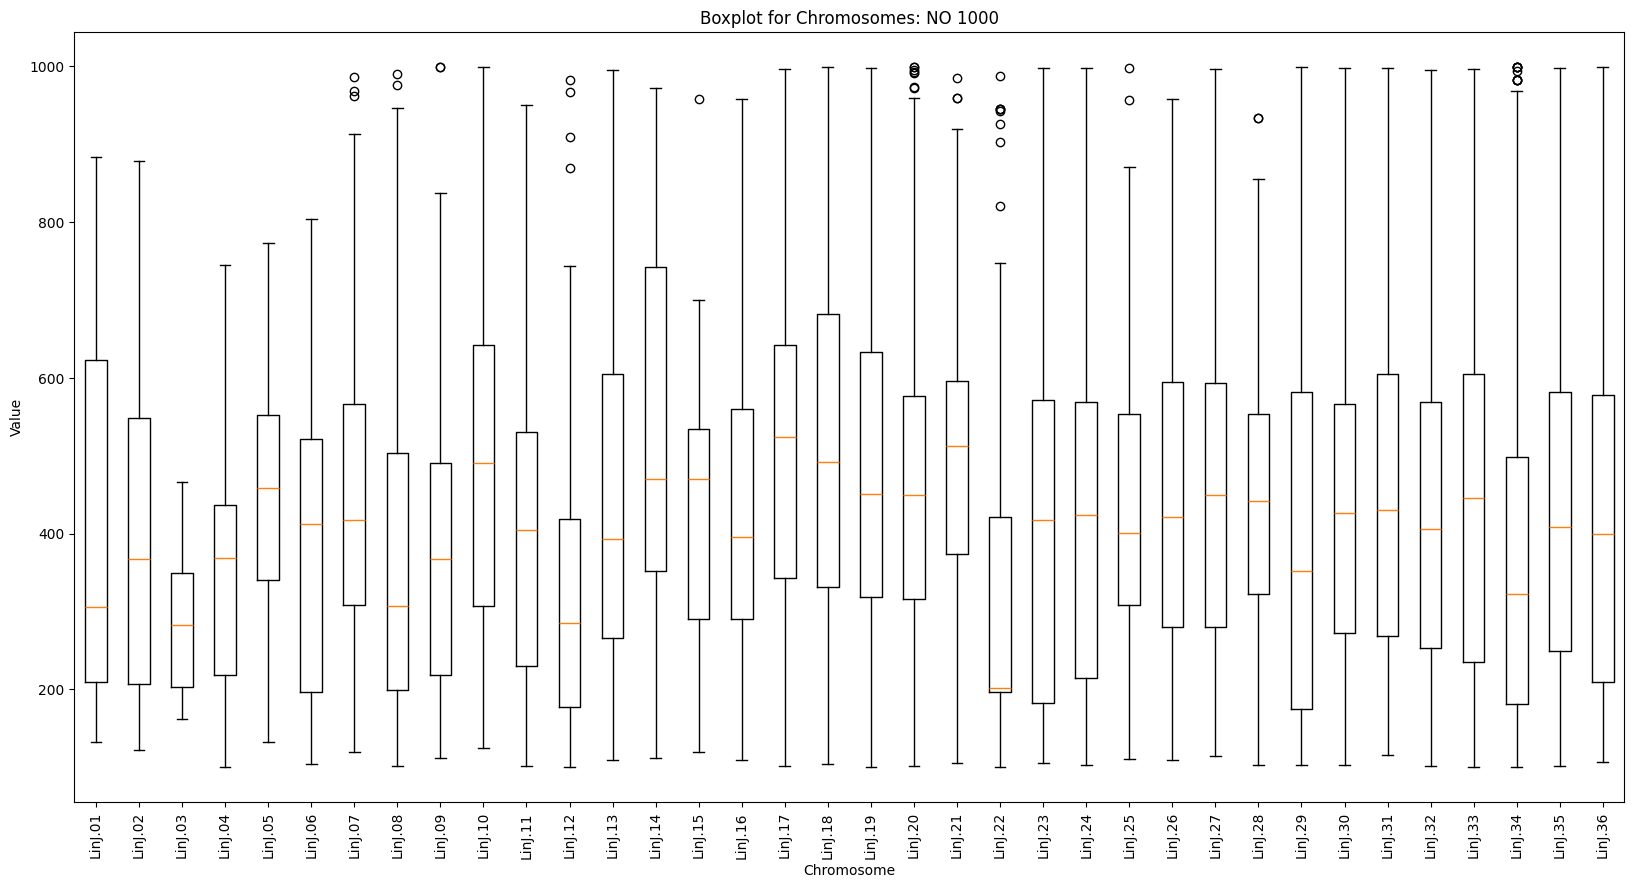

In [17]:
data_df_no_1000_grouped = data_df_no_1000.groupby([0])
plot_data = []

for group_name, group_data in data_df_no_1000_grouped:
    print("="*50)
    print(f"Chromosome {group_name[0]} has {group_data.shape[0]} elements")
    print(group_data[1].describe())

# Boxplot for the data

import matplotlib.pyplot as plt
import seaborn as sns
box_plot_data = [group_data[1] for group_name, group_data in data_df_no_1000_grouped]

plt.figure(figsize=(20, 10))
plt.boxplot(box_plot_data, labels=[group_name[0] for group_name, _ in data_df_no_1000_grouped])
plt.title("Boxplot for Chromosomes: NO 1000")
plt.xlabel("Chromosome")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.savefig("./images/02.boxplot_NORMAL_no1000.png")
plt.show()

### Removing outliers
Removing outliers with sequence length

In [18]:
print(type(data_per_chromosome), data_per_chromosome.size().sum(), sep="\n")

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
5747


In [19]:
data_per_chromosome.get_group(('LinJ.01',)).shape

(33, 6)

In [20]:
data_per_chromosome_no_outliers = pd.DataFrame()
for index, (group_name, group_data) in enumerate(data_per_chromosome, start=1):
    # print(group_name, index)
    Q1 = group_data[1].quantile(0.25)
    Q3 = group_data[1].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = (group_data[1] < (Q1 - threshold * IQR)) | (group_data[1] > (Q3 + threshold * IQR))
    new_data = group_data[~outliers]
    data_per_chromosome_no_outliers = pd.concat([data_per_chromosome_no_outliers, new_data])

In [21]:
data_per_chromosome_no_outliers.shape

(5618, 6)

In [22]:
# Difference between no outliers and outliers
data_per_chromosome.size().sum() - data_per_chromosome_no_outliers.shape[0]

129

Chromosome LinJ.01 has 33 elements
count      33.00000
mean      446.69697
std       268.47154
min       133.00000
25%       210.00000
50%       371.00000
75%       629.00000
max      1000.00000
Name: 1, dtype: float64
Chromosome LinJ.02 has 56 elements
count      56.000000
mean      464.767857
std       282.753410
min       122.000000
25%       207.000000
50%       387.500000
75%       707.250000
max      1104.000000
Name: 1, dtype: float64
Chromosome LinJ.03 has 15 elements
count     15.000000
mean     282.733333
std       90.609418
min      162.000000
25%      203.500000
50%      283.000000
75%      349.500000
max      466.000000
Name: 1, dtype: float64
Chromosome LinJ.04 has 32 elements
count     32.000000
mean     339.062500
std      125.675706
min      100.000000
25%      217.250000
50%      363.000000
75%      430.250000
max      563.000000
Name: 1, dtype: float64
Chromosome LinJ.05 has 32 elements
count     32.000000
mean     453.562500
std      179.504145
min      132.000000
2

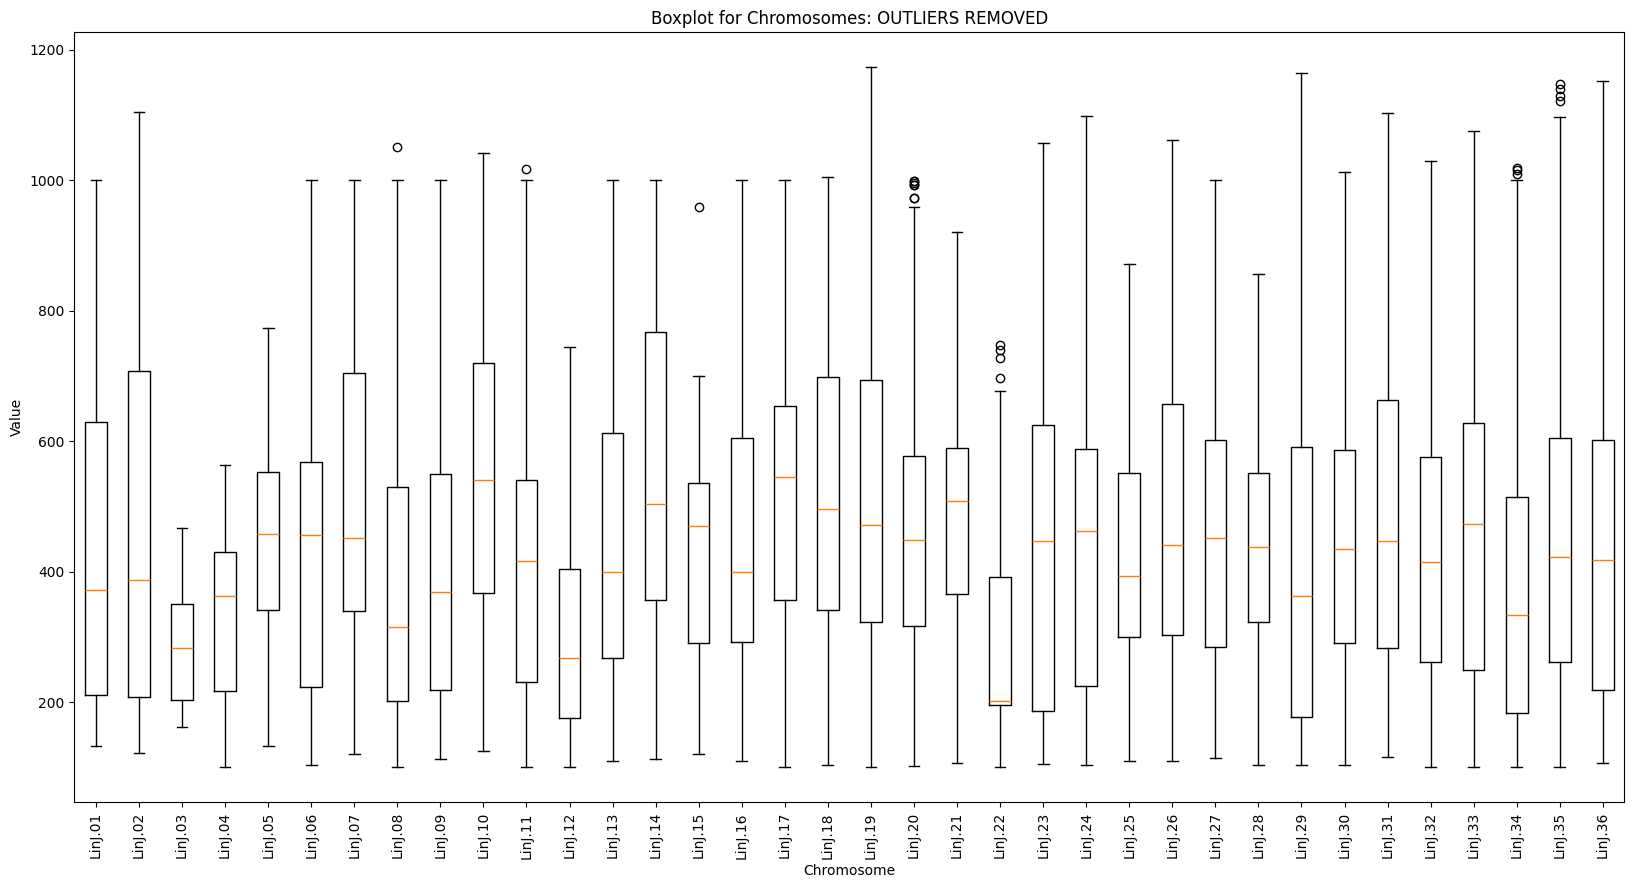

In [23]:
data_per_chromosome_no_outliers_grouped = data_per_chromosome_no_outliers.groupby([0])
plot_data = []

for group_name, group_data in data_per_chromosome_no_outliers_grouped:
    print("="*50)
    print(f"Chromosome {group_name[0]} has {group_data.shape[0]} elements")
    print(group_data[1].describe())

# Boxplot for the data

import matplotlib.pyplot as plt
import seaborn as sns
box_plot_data = [group_data[1] for group_name, group_data in data_per_chromosome_no_outliers_grouped]

plt.figure(figsize=(20, 10))
plt.boxplot(box_plot_data, labels=[group_name[0] for group_name, _ in data_per_chromosome_no_outliers_grouped])
plt.title("Boxplot for Chromosomes: OUTLIERS REMOVED")
plt.xlabel("Chromosome")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.savefig("./images/03.boxplot_NORMAL_no_OUTLIERS.png")
plt.show()

### Removing > 1000 nt

In [24]:
data_no_1000 = data_per_chromosome_no_outliers[data_per_chromosome_no_outliers[1] < 1000]

Chromosome LinJ.01 has 31 elements
count     31.000000
mean     411.000000
std      234.852578
min      133.000000
25%      209.500000
50%      306.000000
75%      623.000000
max      884.000000
Name: 1, dtype: float64
Chromosome LinJ.02 has 51 elements
count     51.000000
mean     410.254902
std      231.998090
min      122.000000
25%      207.000000
50%      367.000000
75%      549.000000
max      878.000000
Name: 1, dtype: float64
Chromosome LinJ.03 has 15 elements
count     15.000000
mean     282.733333
std       90.609418
min      162.000000
25%      203.500000
50%      283.000000
75%      349.500000
max      466.000000
Name: 1, dtype: float64
Chromosome LinJ.04 has 32 elements
count     32.000000
mean     339.062500
std      125.675706
min      100.000000
25%      217.250000
50%      363.000000
75%      430.250000
max      563.000000
Name: 1, dtype: float64
Chromosome LinJ.05 has 32 elements
count     32.000000
mean     453.562500
std      179.504145
min      132.000000
25%      

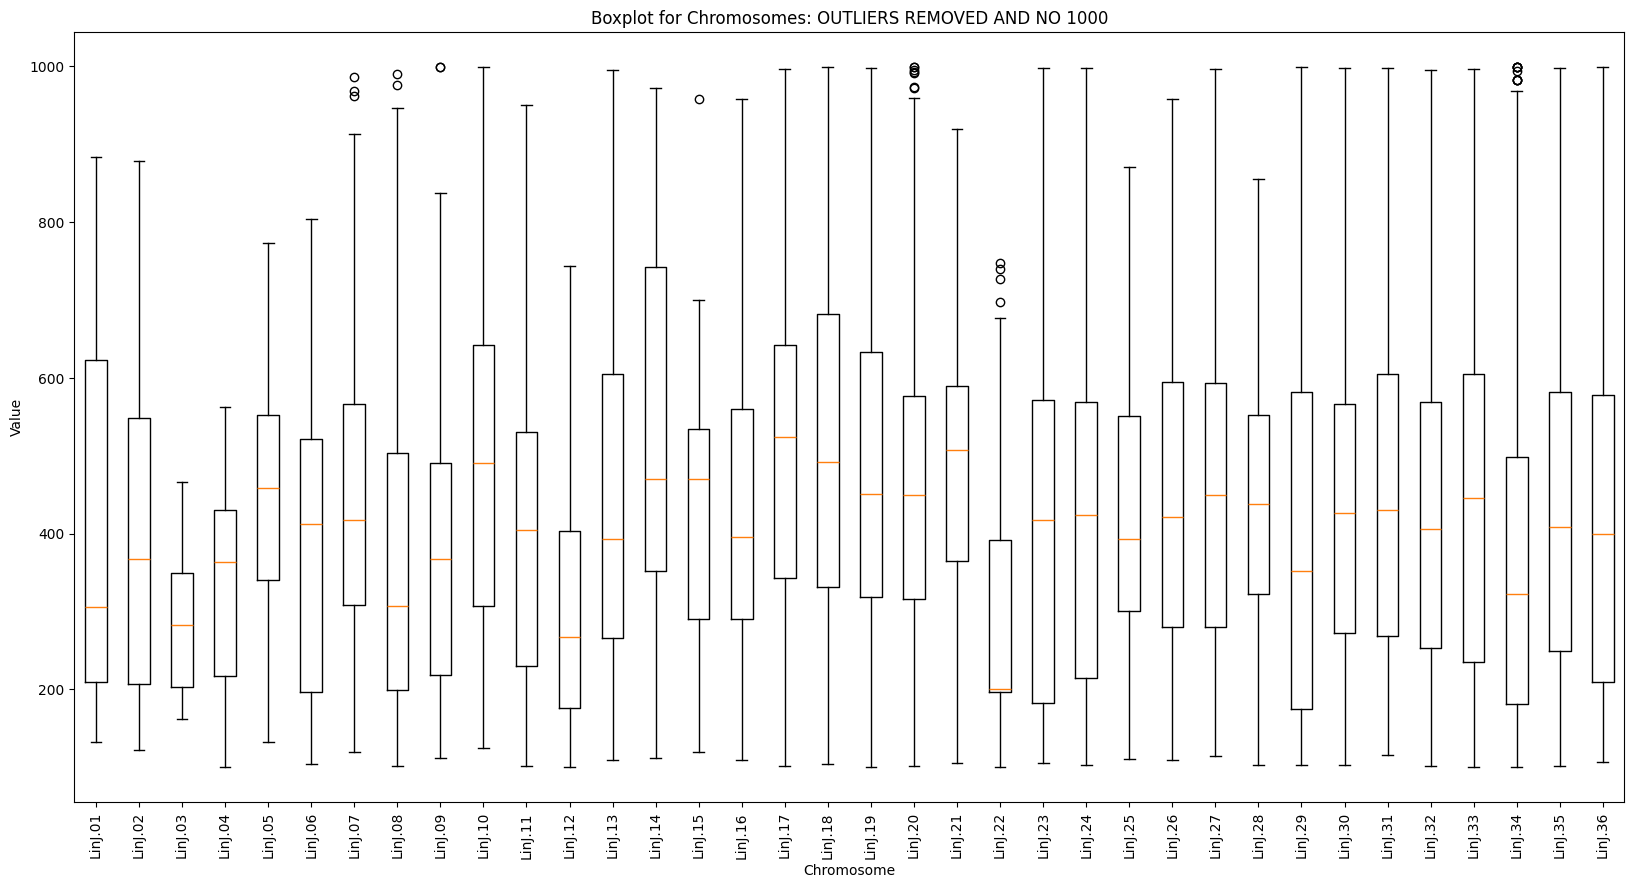

In [25]:
data_no_1000_grouped = data_no_1000.groupby([0])
plot_data = []

for group_name, group_data in data_no_1000_grouped:
    print("="*50)
    print(f"Chromosome {group_name[0]} has {group_data.shape[0]} elements")
    print(group_data[1].describe())

# Boxplot for the data

import matplotlib.pyplot as plt
import seaborn as sns
box_plot_data = [group_data[1] for group_name, group_data in data_no_1000_grouped]

plt.figure(figsize=(20, 10))
plt.boxplot(box_plot_data, labels=[group_name[0] for group_name, _ in data_no_1000_grouped])
plt.title("Boxplot for Chromosomes: OUTLIERS REMOVED AND NO 1000")
plt.xlabel("Chromosome")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.savefig("./images/04.boxplot_NORMAL_no_OUTLIERS_no_1000.png")
plt.show()